# Prostate Cancer Prediction (Accuracy: 76%)

In [1]:
# Importing Libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Importing data as dataframe
df = pd.read_csv("Prostate_Dataset.csv")



df.head

<bound method NDFrame.head of      id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242         

## Exploratory Data Analysis:

In [3]:
# Shape the dataframe
df.shape

(100, 10)

In [4]:
# Summary of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [5]:
# Column names listed out
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [6]:
# Checking for null values
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [7]:
# Remove any rows with 0 value
cleaned_df = df

cleaned_df = df[(df != 0).any(axis=1)]



cleaned_df.shape

(100, 10)

In [8]:
# Dropping Id column
cleaned_df.drop("id", axis=1, inplace=True)

In [9]:
# Descriptive Statistics of Data
cleaned_df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [10]:
# Converting Diagnosis column data to more comprehensive label
diagnosis_code = {"M": "Malignant", "B": "Benign"}



cleaned_df["diagnosis_result"] = cleaned_df["diagnosis_result"].map(diagnosis_code)

## Data Visualisation

C:\Users\cgreenwood\AppData\Local\Temp\ipykernel_10884\3413580460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x="diagnosis_result", data=cleaned_df, palette="Blues")


[Text(0.5, 1.0, 'Prostate Cancer Category Diagnosis'),
 Text(0.5, 0, 'Diagnosis Category'),
 Text(0, 0.5, 'Number of Diagnosis')]

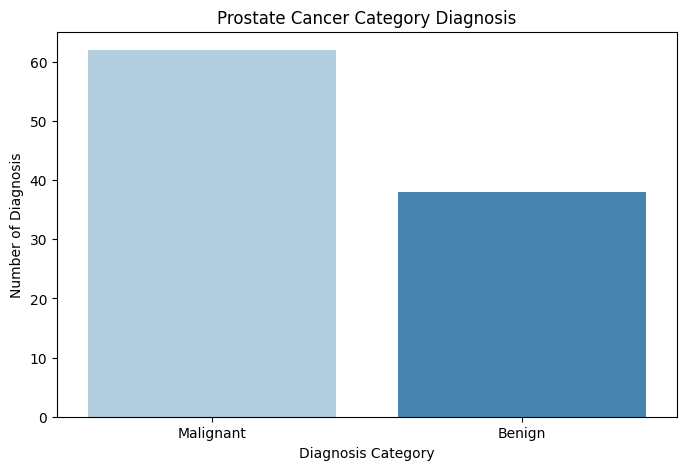

In [11]:
# Countplot to see number of each diagnosis in dataset
plt.figure(figsize=(8, 5))

count_plot = sns.countplot(x="diagnosis_result", data=cleaned_df, palette="Blues")

count_plot.set(
    title="Prostate Cancer Category Diagnosis",
    xlabel="Diagnosis Category",
    ylabel="Number of Diagnosis",
)

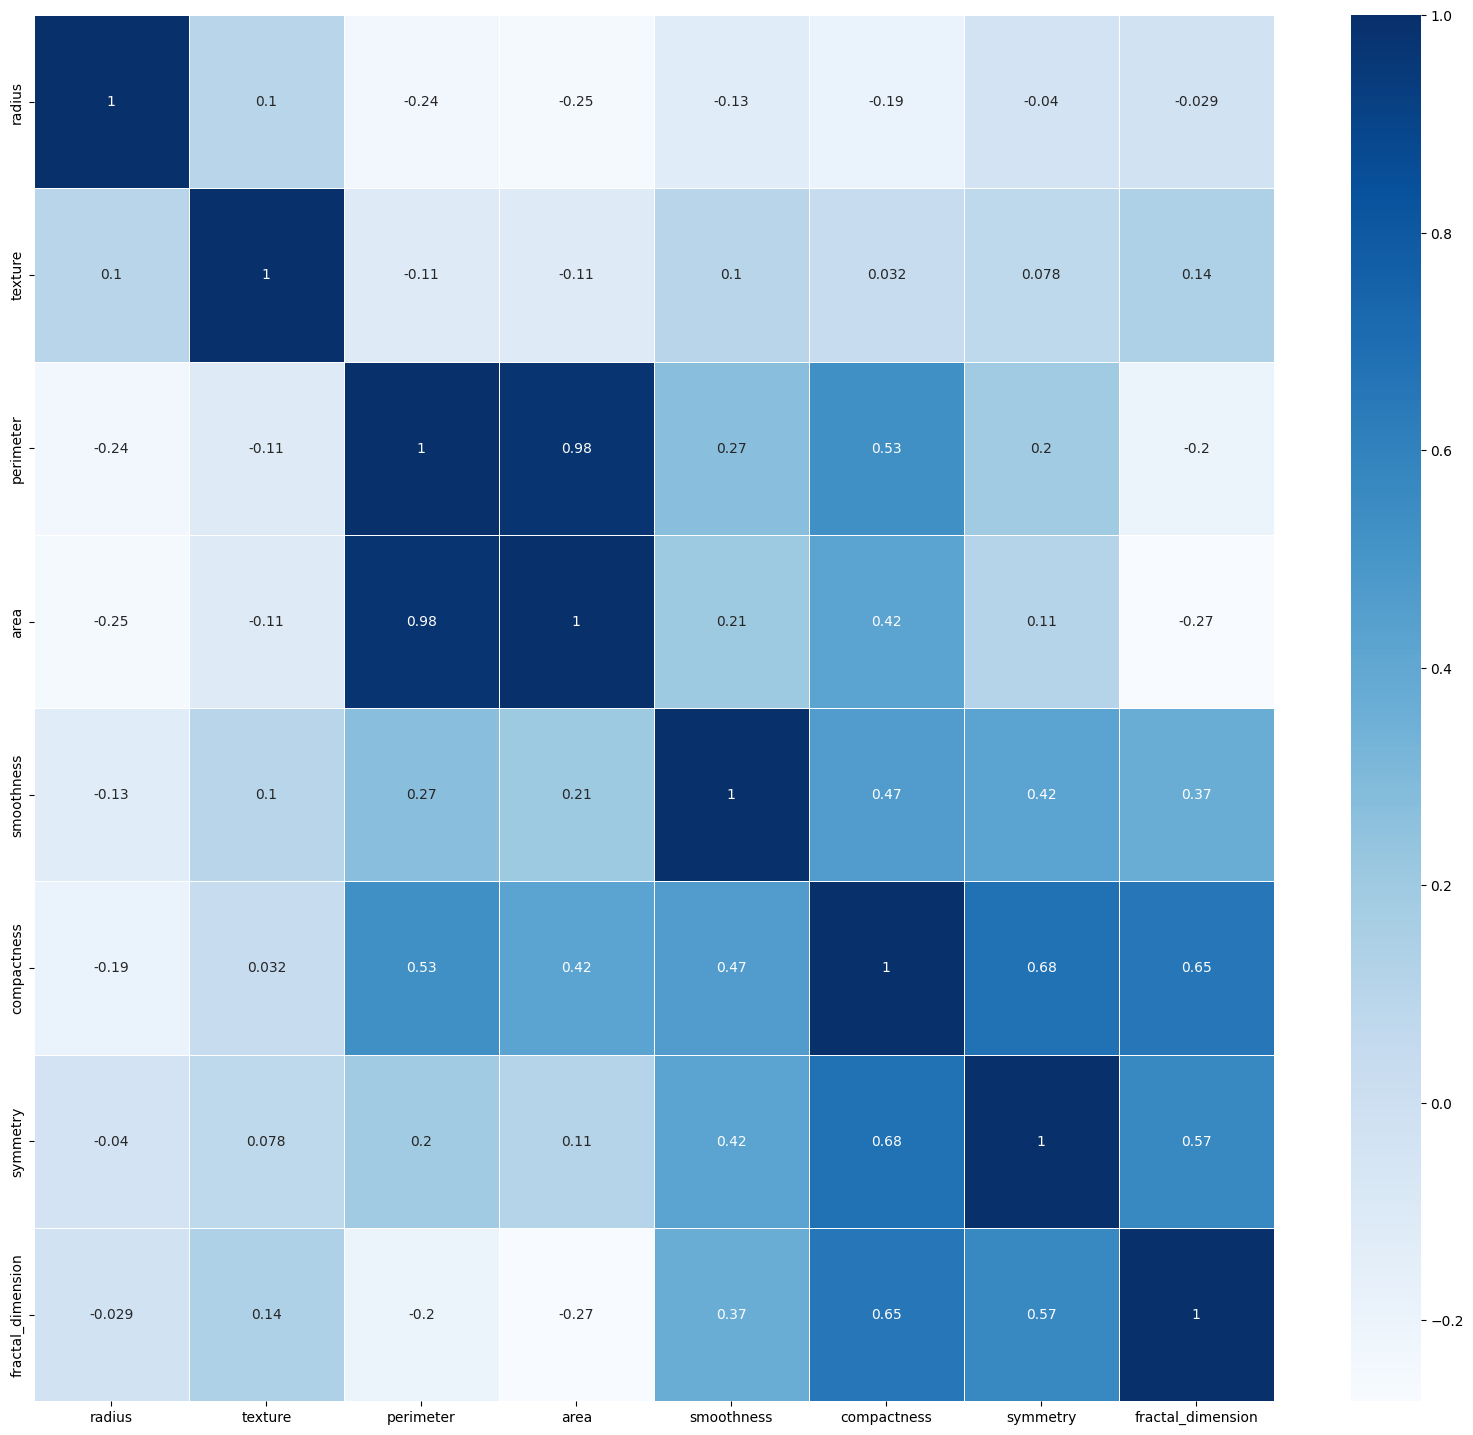

In [12]:
# Heatmap to see correlation between different factors and diagnosis result.
plt.figure(figsize=(20, 18))

heatmap_correlation = cleaned_df.loc[:, cleaned_df.columns != "diagnosis_result"]

heatmap_correlation = sns.heatmap(
    heatmap_correlation.corr(), annot=True, linewidths=0.5, cmap="Blues"
)

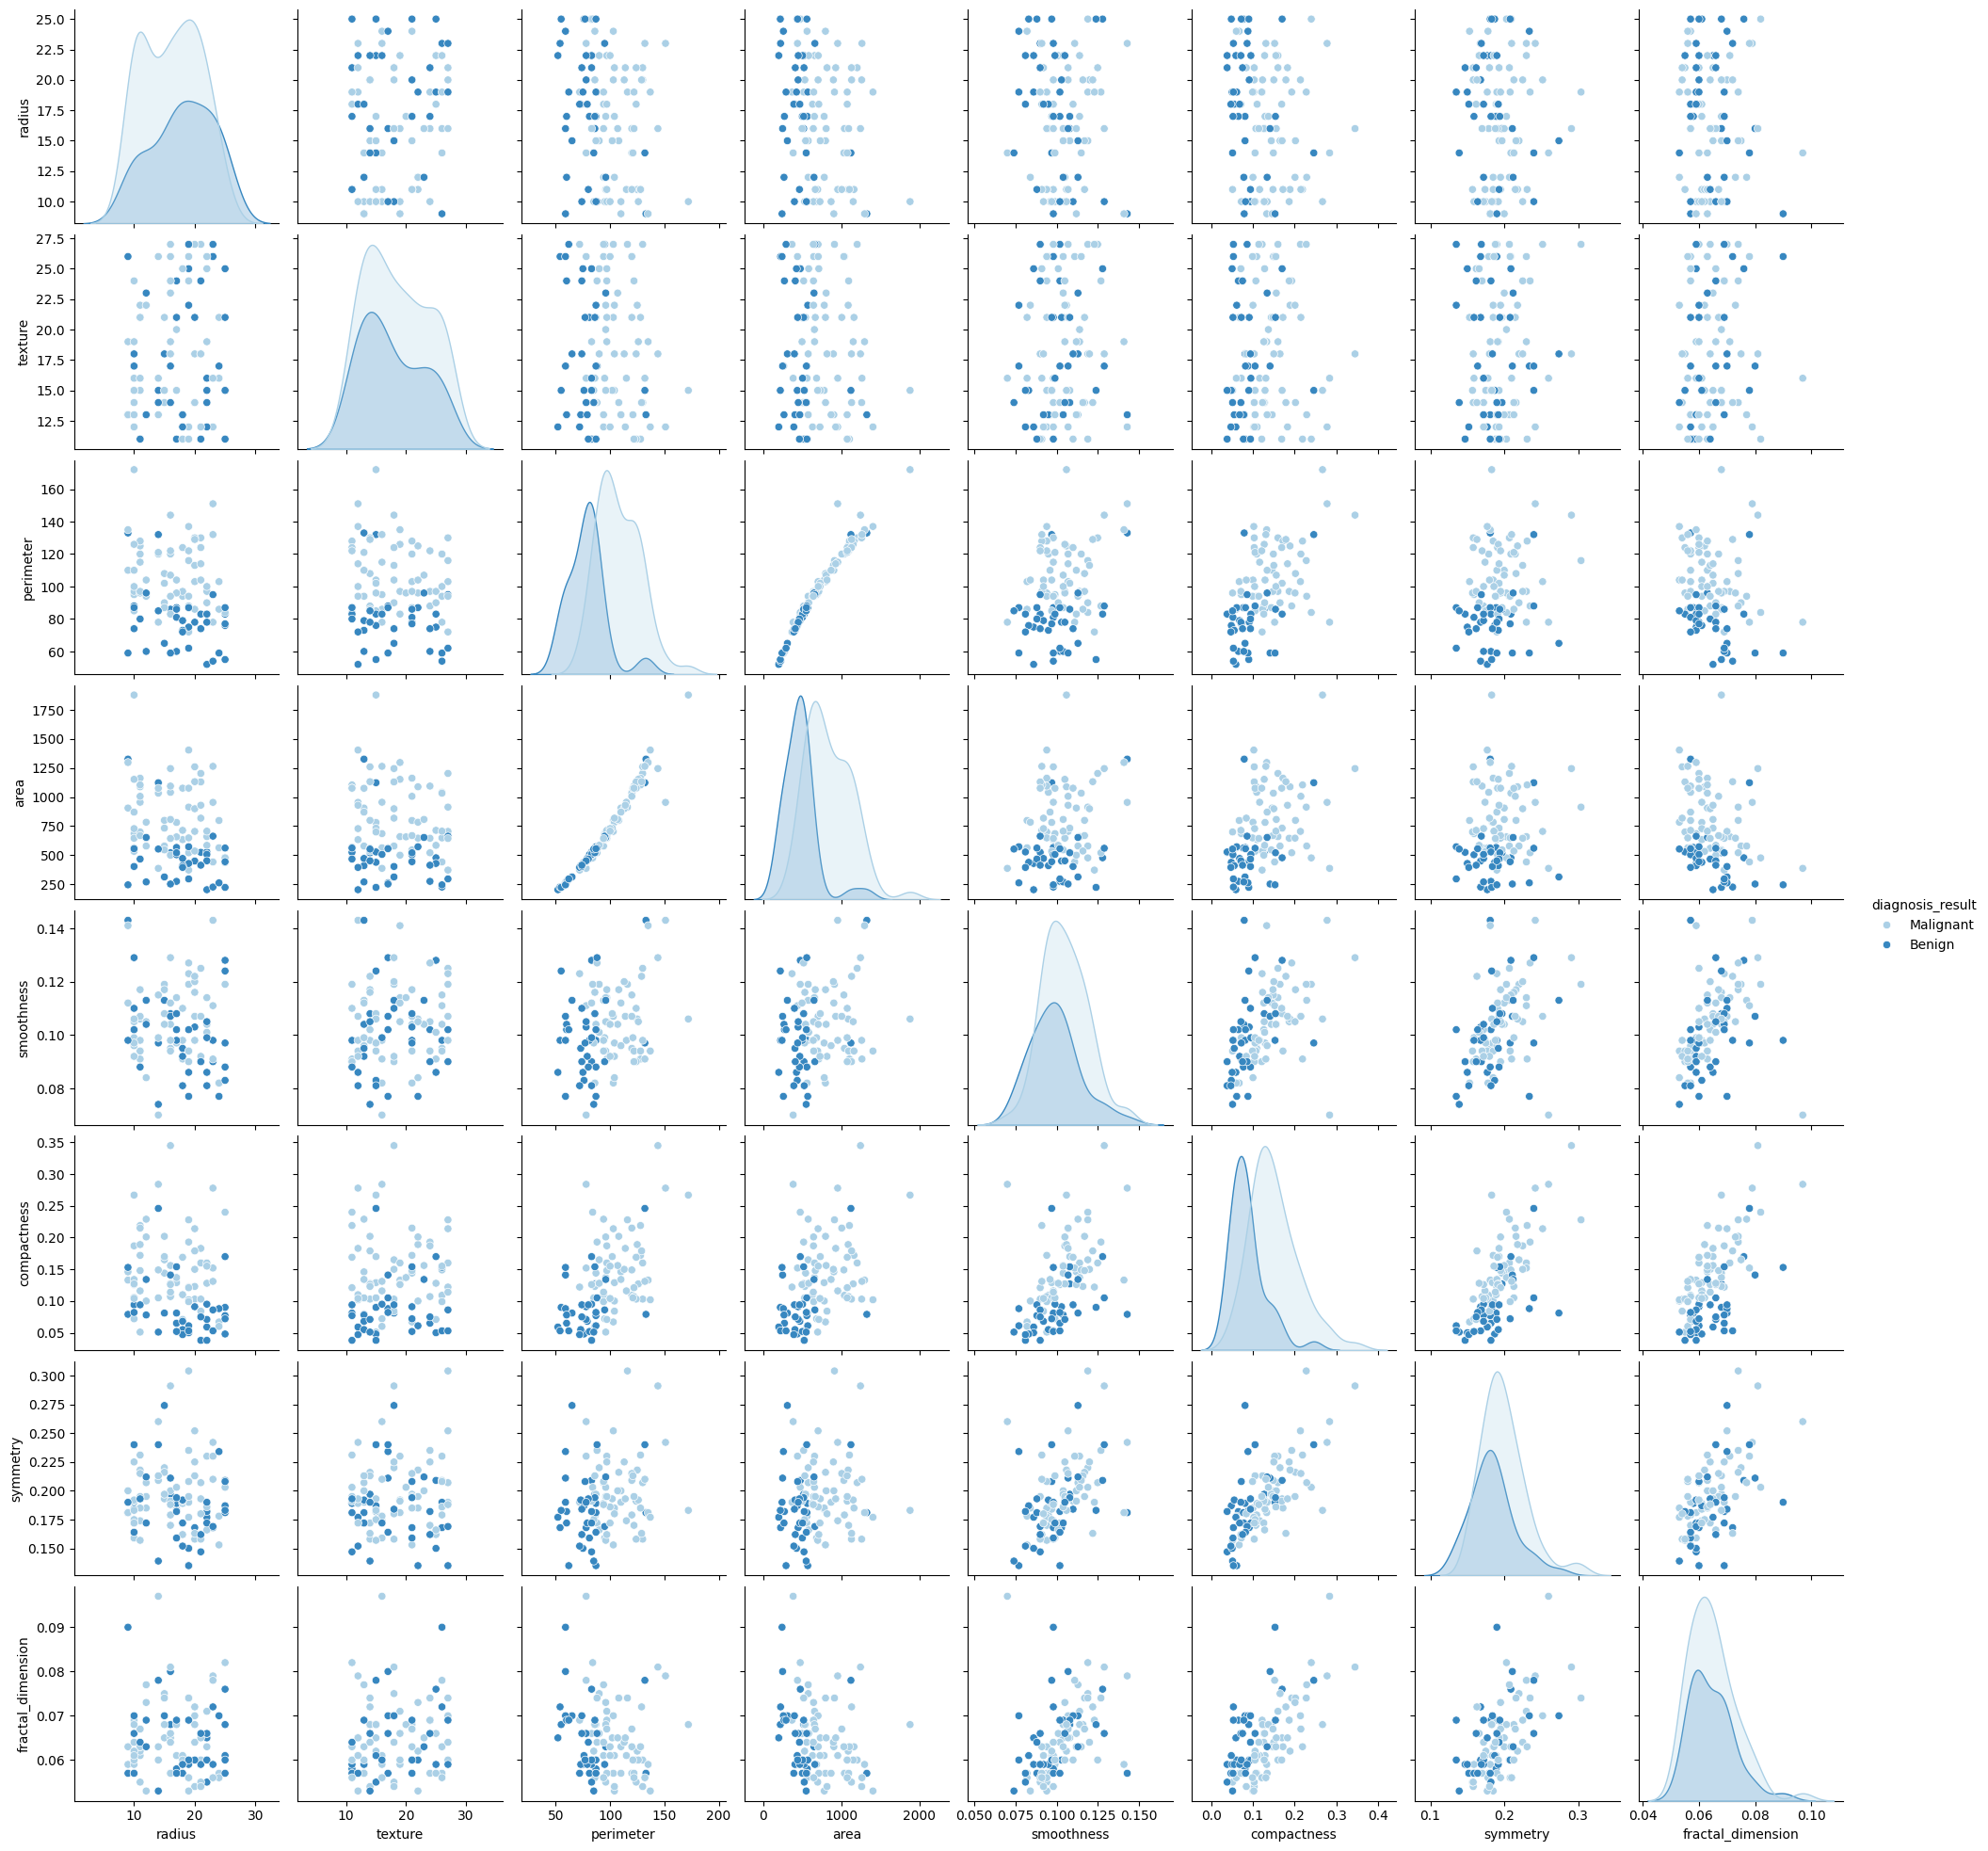

In [13]:
# Mean columns with diagnosis
m_col = [
    "diagnosis_result",
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "symmetry",
    "fractal_dimension",
]


# Pairplot for mean values

sns.pairplot(cleaned_df[m_col], hue="diagnosis_result", palette="Blues")

## Data Preprocessing and Model Building

In [14]:
# Counts of unique rows in the diagnosis_result' column
cleaned_df["diagnosis_result"].value_counts()

diagnosis_result
Malignant    62
Benign       38
Name: count, dtype: int64

In [15]:
# Mapping categorical values to numerical values
cleaned_df["diagnosis_result"] = cleaned_df["diagnosis_result"].map(
    {"Benign": 0, "Malignant": 1}
)

In [16]:
cleaned_df["diagnosis_result"].value_counts()

diagnosis_result
1    62
0    38
Name: count, dtype: int64

## Logistical Regression Model

In [17]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("diagnosis_result", axis=1),
    cleaned_df["diagnosis_result"],
    test_size=0.25,
    random_state=42,
)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (75, 8)
Shape of test set: (25, 8)


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardise the feature
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Applying logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Confusion Matrix: 
 [[ 6  1]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.93      0.72      0.81        18

    accuracy                           0.76        25
   macro avg       0.74      0.79      0.74        25
weighted avg       0.82      0.76      0.77        25



In [20]:
from sklearn.metrics import accuracy_score

# Determining accuracy of the model
logreg_acc = accuracy_score(y_test, predictions)
print("Accuracy of Logistic Regression Model is: ", logreg_acc)

Accuracy of Logistic Regression Model is:  0.76


## K Neighbour Classifier Model

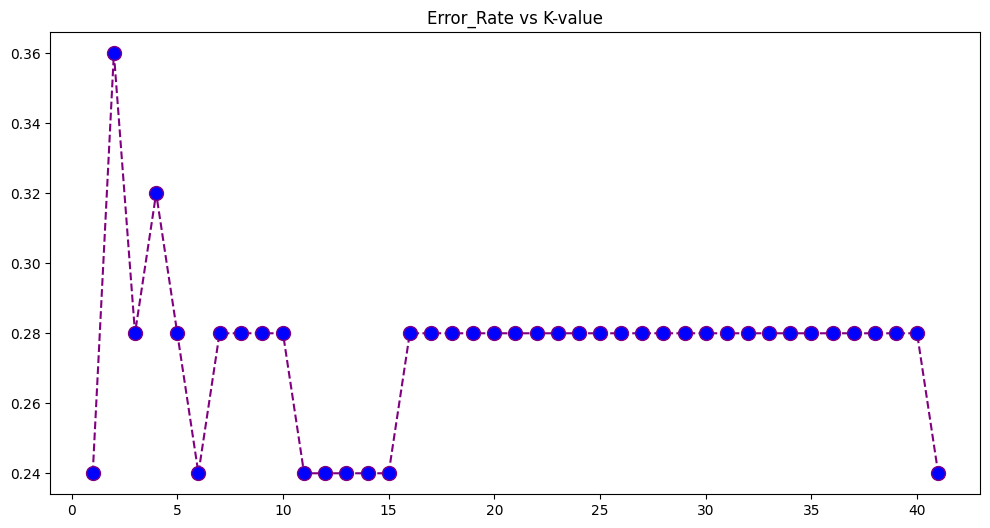

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Find lowest mean error
error_rate = []

for i in range(1, 42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, 42),
    error_rate,
    color="purple",
    linestyle="--",
    marker="o",
    markersize=10,
    markerfacecolor="b",
)
plt.title("Error_Rate vs K-value")
plt.show()

In [22]:
# Applying K Neighbours Classifier Model
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

predictions2 = knn.predict(X_test)

In [23]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[ 6  1]
 [ 5 13]]


              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.93      0.72      0.81        18

    accuracy                           0.76        25
   macro avg       0.74      0.79      0.74        25
weighted avg       0.82      0.76      0.77        25



In [24]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.76
